In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

/home/architkhatri/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/architkhatri/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
airplane = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [3]:
airplane.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [4]:
airplane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
Date            5268 non-null object
Time            3049 non-null object
Location        5248 non-null object
Operator        5250 non-null object
Flight #        1069 non-null object
Route           3562 non-null object
Type            5241 non-null object
Registration    4933 non-null object
cn/In           4040 non-null object
Aboard          5246 non-null float64
Fatalities      5256 non-null float64
Ground          5246 non-null float64
Summary         4878 non-null object
dtypes: float64(3), object(10)
memory usage: 535.1+ KB


In [5]:
airplane.iloc[:10,:]

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
5,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,21.0,0.0,Crashed into trees while attempting to land af...
6,09/03/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when..."
7,07/28/1916,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown."
8,09/24/1916,01:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,22.0,0.0,Shot down by British aircraft crashing in flames.
9,10/01/1916,23:45,"Potters Bar, England",Military - German Navy,NaN,NaN,Zeppelin L-31 (airship),NaN,NaN,19.0,19.0,0.0,Shot down in flames by the British 39th Home D...


In [6]:
airplane.shape

(5268, 13)

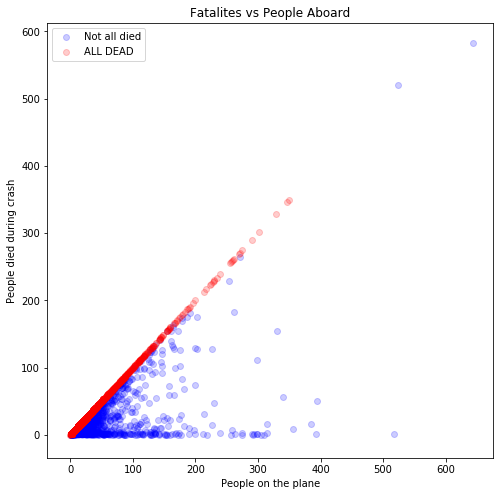

In [7]:
fatalities_array = airplane.loc[:,['Fatalities']].values
aboard_array = airplane.loc[:,['Aboard']].values
all_dead = fatalities_array[:] == aboard_array[:]

plt.figure(figsize = (8,8))
plt.scatter(aboard_array[all_dead == False], fatalities_array[all_dead == False], color = 'blue',
            alpha=0.2, label = "Not all died")
plt.scatter(aboard_array[all_dead],fatalities_array[all_dead], color = 'red',alpha=0.2, label = "ALL DEAD")
plt.title("Fatalites vs People Aboard")
plt.xlabel("People on the plane")
plt.ylabel("People died during crash")
plt.legend()

Text(0,0.5,'Total Crashes')

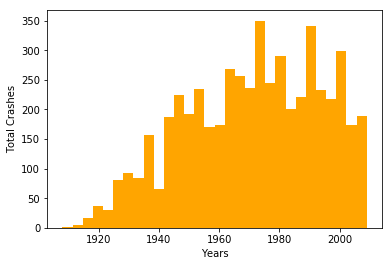

In [8]:
years = airplane['Date'].apply(lambda x: int(x.split('/')[2]))
plt.hist(years, bins = 30,color='orange')
plt.xlabel('Years')
plt.ylabel('Total Crashes')

In [9]:
airplane['years'] = years
airplane['all_dead'] = all_dead

/home/architkhatri/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


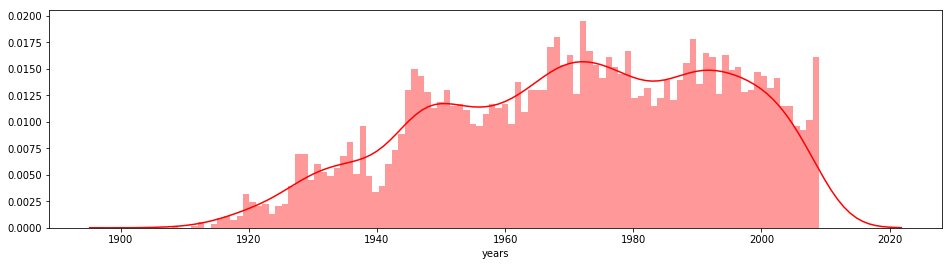

In [10]:
plt.figure(figsize = (16,4))
sns.distplot(airplane['years'], bins = 100, color = 'red')

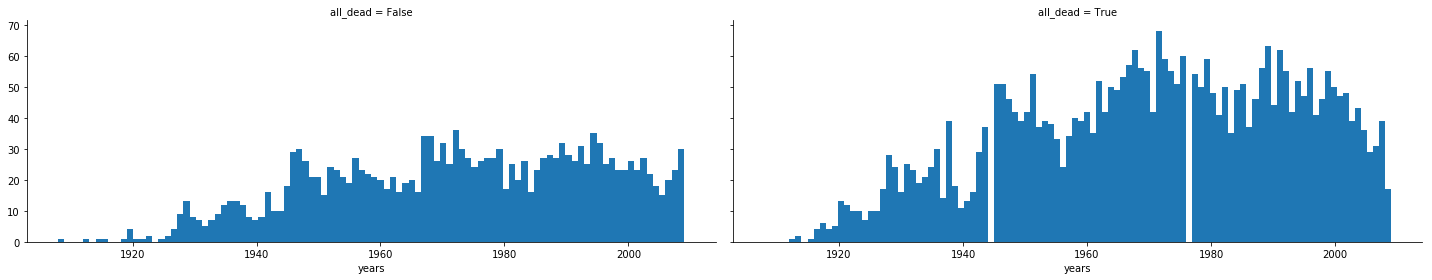

In [11]:
plot = sns.FacetGrid(airplane, col = 'all_dead', aspect = 2.5, height = 4)
_ = plot.map(plt.hist, 'years', bins=100)

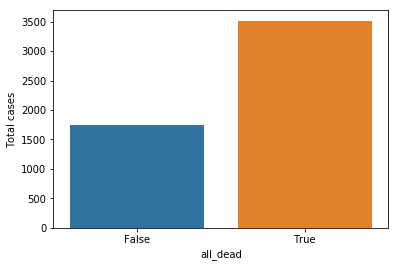

In [12]:
sns.countplot(x = 'all_dead', data = airplane)
_ = plt.ylabel('Total cases')

/home/architkhatri/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


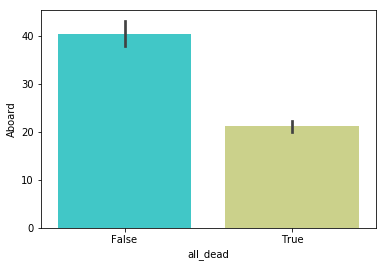

In [13]:
_ = sns.barplot(x = 'all_dead', y = 'Aboard', data = airplane, palette = 'rainbow')

In [14]:
airplane.head(1)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,years,all_dead
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,False


In [22]:
hours = []
for i in range(25):
    hours.append(str(i))

airplane['Hours'] = airplane['Time'].apply(lambda x: str(x).split(":")[0])
airplane['Hours'] = airplane['Hours'][airplane['Hours'] != 'nan']
airplane['Hours'] = airplane['Hours'][airplane['Hours'].isin(hours)]
airplane['Hours'] = np.array(airplane['Hours'], dtype=np.float64)


Text(0,0.5,'Crash cases')

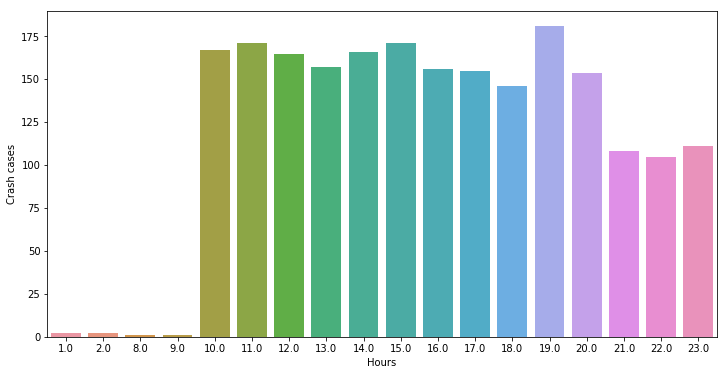

In [25]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Hours', data = airplane)
plt.ylabel('Crash cases')